In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train_k.csv')
test = pd.read_csv('test_k.csv')
store = pd.read_csv('store_k.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


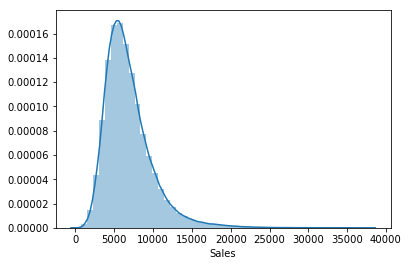

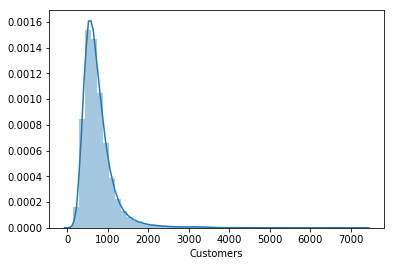

In [18]:
sns.distplot(train[train['Open']==1]['Sales'])
plt.show()
sns.distplot(train[train['Open']==1]['Customers'])
plt.show()

In [13]:
train.StateHoliday = train.StateHoliday.replace({'0':0,'a':1,'b':2,'c':3})

In [15]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2014-07-31,5106,575,1,1,0,0
1,2,4,2014-07-31,6301,703,1,1,0,1


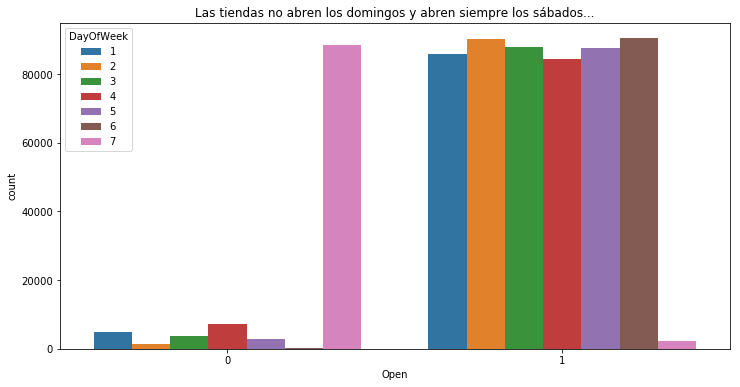

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='Open',hue='DayOfWeek',data=train)
plt.title('Las tiendas no abren los domingos y abren siempre los sábados...')

Qué tanto afectan los StateHoliday y SchoolHoliday a las ventas y a los customers?

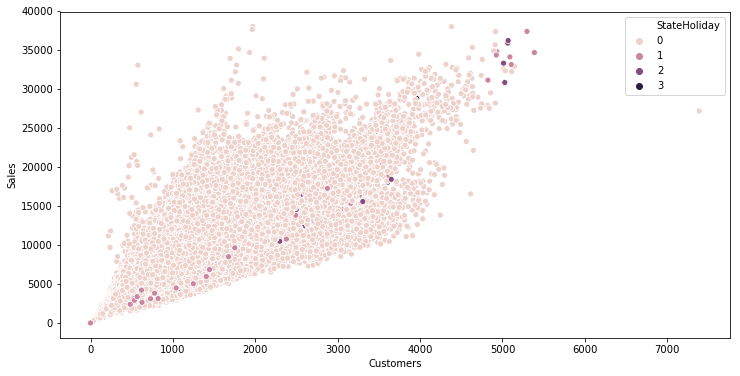

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Customers',y='Sales',hue='StateHoliday',data=train)

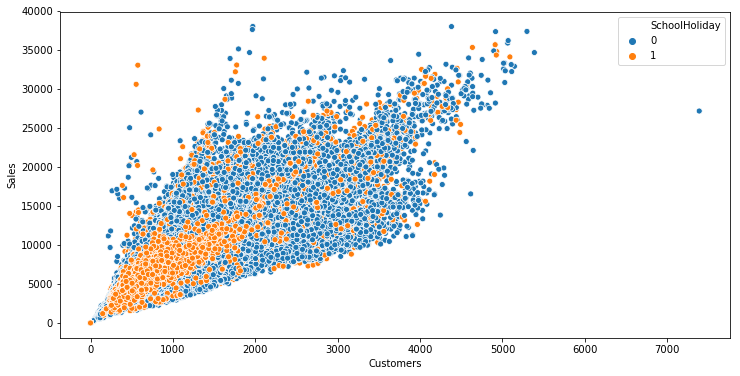

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Customers',y='Sales',hue='SchoolHoliday',data=train)

In [48]:
train[train['Open']==0].Sales.max()

0

### Correlación entre las variables

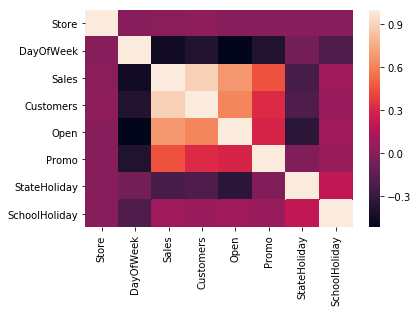

In [26]:
corr_ = train.corr()
sns.heatmap(corr_)

In [30]:
train['Month'] = train['Date'].apply(lambda x : int(str(x)[5:7]))
train['Year'] = train['Date'].apply(lambda x : int(str(x)[:4]))
train['MonthYear'] = train['Date'].apply(lambda x : (str(x)[:7]))

In [34]:
# Sacaremos indicadores de las ventas a través del tiempo (Month-Year) y veremos cómo se comportan

median_sales = train.groupby('MonthYear')['Sales'].agg('median')
mean_sales = train.groupby('MonthYear')['Sales'].agg('mean')
pct_change_sales = train.groupby('MonthYear')['Sales'].median().pct_change()

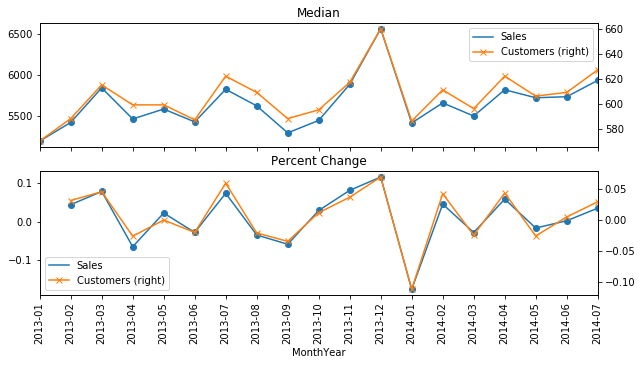

In [38]:
# median sales
median_sales = train.groupby('MonthYear')['Sales'].median()
pct_median_change = train.groupby('MonthYear')['Sales'].median().pct_change()
# median customers
median_cust = train.groupby('MonthYear')['Customers'].median()
pct_median_custchange = train.groupby('MonthYear')['Customers'].median().pct_change()

fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)
#pd.rolling_mean(median_sales, window=7).plot(ax=axis1)
# plot pct change
ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Percent Change")

# overlay customer data
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

### QQ PLOT

In [40]:
train['Sales/Customers'] = train.Sales / train.Customers